##  Policy Iteration

Steps are:
1. Start with a random strategy $\pi_0$
2. Evaluate the policy $\pi_0$ and construct $V^{\pi_0}$
3. Be greedy and select the best actions from $V^{\pi_0}$ which will give us $\pi_1$
4. Repeat until convergence

In policy iteration, we start by choosing an arbitrary policy \boldsymbol{\pi}. Then, we iteratively evaluate and improve the policy until convergence:

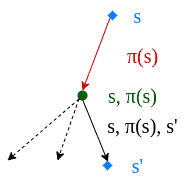

In [1]:
from IPython.display import Image 
pil_img = Image(filename='p1.png')
display(pil_img)

Policy evaluation can be characterised as V^pi(S) as defined by the following equation:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msup>
    <mi>V</mi>
    <mi>&#x3C0;</mi>
  </msup>
  <mo stretchy="false">(</mo>
  <mi>s</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <munder>
    <mo data-mjx-texclass="OP">&#x2211;</mo>
    <mrow data-mjx-texclass="ORD">
      <msup>
        <mi>s</mi>
        <mo data-mjx-alternate="1">&#x2032;</mo>
      </msup>
      <mo>&#x2208;</mo>
      <mi>S</mi>
    </mrow>
  </munder>
  <msub>
    <mi>P</mi>
    <mrow data-mjx-texclass="ORD">
      <mi>&#x3C0;</mi>
      <mo stretchy="false">(</mo>
      <mi>s</mi>
      <mo stretchy="false">)</mo>
    </mrow>
  </msub>
  <mo stretchy="false">(</mo>
  <msup>
    <mi>s</mi>
    <mo data-mjx-alternate="1">&#x2032;</mo>
  </msup>
  <mo>&#x2223;</mo>
  <mi>s</mi>
  <mo stretchy="false">)</mo>
  <mtext>&#xA0;</mtext>
  <mo stretchy="false">[</mo>
  <mi>r</mi>
  <mo stretchy="false">(</mo>
  <mi>s</mi>
  <mo>,</mo>
  <mi>a</mi>
  <mo>,</mo>
  <msup>
    <mi>s</mi>
    <mo data-mjx-alternate="1">&#x2032;</mo>
  </msup>
  <mo stretchy="false">)</mo>
  <mo>+</mo>
  <mi>&#x3B3;</mi>
  <mtext>&#xA0;</mtext>
  <msup>
    <mi>V</mi>
    <mi>&#x3C0;</mi>
  </msup>
  <mo stretchy="false">(</mo>
  <msup>
    <mi>s</mi>
    <mo data-mjx-alternate="1">&#x2032;</mo>
  </msup>
  <mo stretchy="false">)</mo>
  <mo stretchy="false">]</mo>
</math>

Once we understand the definition of policy evaluation, the implementation is straightforward. It is the same as value iteration except that we use the policy evaluation equation instead of the Bellman equation.

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mtable columnalign="left" columnspacing="1em" rowspacing="4pt 0.4em 0.967em 0.4em 0.4em 0.4em 0.4em 0.4em 0.4em 0.4em">
    <mtr>
      <mtd>
        <mrow data-mjx-texclass="ORD">
          <mi mathvariant="bold">Input</mi>
        </mrow>
        <mo>:</mo>
        <mtext>&#xA0;</mtext>
        <mi>&#x3C0;</mi>
        <mtext>&#xA0;</mtext>
        <mtext>the policy for evaluation</mtext>
        <mo>,</mo>
        <msup>
          <mi>V</mi>
          <mi>&#x3C0;</mi>
        </msup>
        <mtext>&#xA0;</mtext>
        <mtext>value function, and</mtext>
      </mtd>
    </mtr>
    <mtr>
      <mtd>
        <mstyle scriptlevel="0">
          <mspace width="1em"></mspace>
        </mstyle>
        <mstyle scriptlevel="0">
          <mspace width="1em"></mspace>
        </mstyle>
        <mstyle scriptlevel="0">
          <mspace width="1em"></mspace>
        </mstyle>
        <mstyle scriptlevel="0">
          <mspace width="1em"></mspace>
        </mstyle>
        <mtext>MDP</mtext>
        <mtext>&#xA0;</mtext>
        <mi>M</mi>
        <mo>=</mo>
        <mo fence="false" stretchy="false">&#x27E8;</mo>
        <mi>S</mi>
        <mo>,</mo>
        <msub>
          <mi>s</mi>
          <mn>0</mn>
        </msub>
        <mo>,</mo>
        <mi>A</mi>
        <mo>,</mo>
        <msub>
          <mi>P</mi>
          <mi>a</mi>
        </msub>
        <mo stretchy="false">(</mo>
        <msup>
          <mi>s</mi>
          <mo data-mjx-alternate="1">&#x2032;</mo>
        </msup>
        <mo>&#x2223;</mo>
        <mi>s</mi>
        <mo stretchy="false">)</mo>
        <mo>,</mo>
        <mi>r</mi>
        <mo stretchy="false">(</mo>
        <mi>s</mi>
        <mo>,</mo>
        <mi>a</mi>
        <mo>,</mo>
        <msup>
          <mi>s</mi>
          <mo data-mjx-alternate="1">&#x2032;</mo>
        </msup>
        <mo stretchy="false">)</mo>
        <mo fence="false" stretchy="false">&#x27E9;</mo>
      </mtd>
    </mtr>
    <mtr>
      <mtd>
        <mrow data-mjx-texclass="ORD">
          <mi mathvariant="bold">Output</mi>
        </mrow>
        <mo>:</mo>
        <mtext>&#xA0;</mtext>
        <mtext>Value function</mtext>
        <mtext>&#xA0;</mtext>
        <msup>
          <mi>V</mi>
          <mi>&#x3C0;</mi>
        </msup>
      </mtd>
    </mtr>
    <mtr>
      <mtd>
        <mrow data-mjx-texclass="ORD">
          <mi mathvariant="bold">repeat</mi>
        </mrow>
      </mtd>
    </mtr>
    <mtr>
      <mtd>
        <mstyle scriptlevel="0">
          <mspace width="1em"></mspace>
        </mstyle>
        <mstyle scriptlevel="0">
          <mspace width="1em"></mspace>
        </mstyle>
        <mi mathvariant="normal">&#x394;</mi>
        <mo stretchy="false">&#x2190;</mo>
        <mn>0</mn>
      </mtd>
    </mtr>
    <mtr>
      <mtd>
        <mstyle scriptlevel="0">
          <mspace width="1em"></mspace>
        </mstyle>
        <mstyle scriptlevel="0">
          <mspace width="1em"></mspace>
        </mstyle>
        <mrow data-mjx-texclass="ORD">
          <mi mathvariant="bold">for</mi>
          <mtext>&#xA0;</mtext>
          <mi mathvariant="bold">each</mi>
        </mrow>
        <mtext>&#xA0;</mtext>
        <mi>s</mi>
        <mo>&#x2208;</mo>
        <mi>S</mi>
      </mtd>
    </mtr>
    <mtr>
      <mtd>
        <mstyle scriptlevel="0">
          <mspace width="1em"></mspace>
        </mstyle>
        <mstyle scriptlevel="0">
          <mspace width="1em"></mspace>
        </mstyle>
        <mstyle scriptlevel="0">
          <mspace width="1em"></mspace>
        </mstyle>
        <mstyle scriptlevel="0">
          <mspace width="1em"></mspace>
        </mstyle>
        <munder>
          <mrow data-mjx-texclass="OP">
            <munder>
              <mrow>
                <msup>
                  <mi>V</mi>
                  <mrow>
                    <mo data-mjx-alternate="1" data-mjx-pseudoscript="true">&#x2032;</mo>
                    <mrow data-mjx-texclass="ORD">
                      <mi>&#x3C0;</mi>
                    </mrow>
                  </mrow>
                </msup>
                <mo stretchy="false">(</mo>
                <mi>s</mi>
                <mo stretchy="false">)</mo>
                <mo stretchy="false">&#x2190;</mo>
                <munder>
                  <mo data-mjx-texclass="OP">&#x2211;</mo>
                  <mrow data-mjx-texclass="ORD">
                    <msup>
                      <mi>s</mi>
                      <mo data-mjx-alternate="1">&#x2032;</mo>
                    </msup>
                    <mo>&#x2208;</mo>
                    <mi>S</mi>
                  </mrow>
                </munder>
                <msub>
                  <mi>P</mi>
                  <mrow data-mjx-texclass="ORD">
                    <mi>&#x3C0;</mi>
                    <mo stretchy="false">(</mo>
                    <mi>s</mi>
                    <mo stretchy="false">)</mo>
                  </mrow>
                </msub>
                <mo stretchy="false">(</mo>
                <msup>
                  <mi>s</mi>
                  <mo data-mjx-alternate="1">&#x2032;</mo>
                </msup>
                <mo>&#x2223;</mo>
                <mi>s</mi>
                <mo stretchy="false">)</mo>
                <mtext>&#xA0;</mtext>
                <mo stretchy="false">[</mo>
                <mi>r</mi>
                <mo stretchy="false">(</mo>
                <mi>s</mi>
                <mo>,</mo>
                <mi>a</mi>
                <mo>,</mo>
                <msup>
                  <mi>s</mi>
                  <mo data-mjx-alternate="1">&#x2032;</mo>
                </msup>
                <mo stretchy="false">)</mo>
                <mo>+</mo>
                <mi>&#x3B3;</mi>
                <mtext>&#xA0;</mtext>
                <msup>
                  <mi>V</mi>
                  <mi>&#x3C0;</mi>
                </msup>
                <mo stretchy="false">(</mo>
                <msup>
                  <mi>s</mi>
                  <mo data-mjx-alternate="1">&#x2032;</mo>
                </msup>
                <mo stretchy="false">)</mo>
                <mo stretchy="false">]</mo>
              </mrow>
              <mo>&#x23DF;</mo>
            </munder>
          </mrow>
          <mrow data-mjx-texclass="ORD">
            <mtext>Policy evaluation equation</mtext>
          </mrow>
        </munder>
      </mtd>
    </mtr>
    <mtr>
      <mtd>
        <mstyle scriptlevel="0">
          <mspace width="1em"></mspace>
        </mstyle>
        <mstyle scriptlevel="0">
          <mspace width="1em"></mspace>
        </mstyle>
        <mstyle scriptlevel="0">
          <mspace width="1em"></mspace>
        </mstyle>
        <mstyle scriptlevel="0">
          <mspace width="1em"></mspace>
        </mstyle>
        <mi mathvariant="normal">&#x394;</mi>
        <mo stretchy="false">&#x2190;</mo>
        <mo data-mjx-texclass="OP" movablelimits="true">max</mo>
        <mo stretchy="false">(</mo>
        <mi mathvariant="normal">&#x394;</mi>
        <mo>,</mo>
        <mrow data-mjx-texclass="ORD">
          <mo stretchy="false">|</mo>
        </mrow>
        <msup>
          <mi>V</mi>
          <mrow>
            <mo data-mjx-alternate="1" data-mjx-pseudoscript="true">&#x2032;</mo>
            <mi>&#x3C0;</mi>
          </mrow>
        </msup>
        <mo stretchy="false">(</mo>
        <mi>s</mi>
        <mo stretchy="false">)</mo>
        <mo>&#x2212;</mo>
        <msup>
          <mi>V</mi>
          <mi>&#x3C0;</mi>
        </msup>
        <mo stretchy="false">(</mo>
        <mi>s</mi>
        <mo stretchy="false">)</mo>
        <mrow data-mjx-texclass="ORD">
          <mo stretchy="false">|</mo>
        </mrow>
        <mo stretchy="false">)</mo>
      </mtd>
    </mtr>
    <mtr>
      <mtd>
        <mstyle scriptlevel="0">
          <mspace width="1em"></mspace>
        </mstyle>
        <mstyle scriptlevel="0">
          <mspace width="1em"></mspace>
        </mstyle>
        <msup>
          <mi>V</mi>
          <mi>&#x3C0;</mi>
        </msup>
        <mo stretchy="false">&#x2190;</mo>
        <msup>
          <mi>V</mi>
          <mrow>
            <mo data-mjx-alternate="1" data-mjx-pseudoscript="true">&#x2032;</mo>
            <mi>&#x3C0;</mi>
          </mrow>
        </msup>
      </mtd>
    </mtr>
    <mtr>
      <mtd>
        <mrow data-mjx-texclass="ORD">
          <mi mathvariant="bold">until</mi>
        </mrow>
        <mtext>&#xA0;</mtext>
        <mi mathvariant="normal">&#x394;</mi>
        <mo>&#x2264;</mo>
        <mi>&#x3B8;</mi>
      </mtd>
    </mtr>
  </mtable>
</math>

## Policy Iteration

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mtable columnalign="left" columnspacing="1em" rowspacing="4pt 0.967em 0.4em 0.967em 0.4em 0.4em 0.4em 0.4em 0.4em">
    <mtr>
      <mtd>
        <mrow data-mjx-texclass="ORD">
          <mi mathvariant="bold">Input</mi>
        </mrow>
        <mo>:</mo>
        <mtext>&#xA0;</mtext>
        <mtext>MDP</mtext>
        <mtext>&#xA0;</mtext>
        <mi>M</mi>
        <mo>=</mo>
        <mo fence="false" stretchy="false">&#x27E8;</mo>
        <mi>S</mi>
        <mo>,</mo>
        <msub>
          <mi>s</mi>
          <mn>0</mn>
        </msub>
        <mo>,</mo>
        <mi>A</mi>
        <mo>,</mo>
        <msub>
          <mi>P</mi>
          <mi>a</mi>
        </msub>
        <mo stretchy="false">(</mo>
        <msup>
          <mi>s</mi>
          <mo data-mjx-alternate="1">&#x2032;</mo>
        </msup>
        <mo>&#x2223;</mo>
        <mi>s</mi>
        <mo stretchy="false">)</mo>
        <mo>,</mo>
        <mi>r</mi>
        <mo stretchy="false">(</mo>
        <mi>s</mi>
        <mo>,</mo>
        <mi>a</mi>
        <mo>,</mo>
        <msup>
          <mi>s</mi>
          <mo data-mjx-alternate="1">&#x2032;</mo>
        </msup>
        <mo stretchy="false">)</mo>
        <mo fence="false" stretchy="false">&#x27E9;</mo>
      </mtd>
    </mtr>
    <mtr>
      <mtd>
        <mrow data-mjx-texclass="ORD">
          <mi mathvariant="bold">Output</mi>
        </mrow>
        <mo>:</mo>
        <mtext>&#xA0;</mtext>
        <mi>P</mi>
        <mi>o</mi>
        <mi>l</mi>
        <mi>i</mi>
        <mi>c</mi>
        <mi>y</mi>
        <mtext>&#xA0;</mtext>
        <mi>&#x3C0;</mi>
      </mtd>
    </mtr>
    <mtr>
      <mtd>
        <mtext>Set</mtext>
        <mtext>&#xA0;</mtext>
        <msup>
          <mi>V</mi>
          <mi>&#x3C0;</mi>
        </msup>
        <mtext>&#xA0;</mtext>
        <mtext>to arbitrary value function; e.g.,</mtext>
        <mtext>&#xA0;</mtext>
        <msup>
          <mi>V</mi>
          <mi>&#x3C0;</mi>
        </msup>
        <mo stretchy="false">(</mo>
        <mi>s</mi>
        <mo stretchy="false">)</mo>
        <mo>=</mo>
        <mn>0</mn>
        <mtext>&#xA0;</mtext>
        <mtext>for all</mtext>
        <mtext>&#xA0;</mtext>
        <mi>s</mi>
      </mtd>
    </mtr>
    <mtr>
      <mtd>
        <mtext>Set</mtext>
        <mtext>&#xA0;</mtext>
        <mi>&#x3C0;</mi>
        <mtext>&#xA0;</mtext>
        <mtext>to arbitrary policy; e.g.</mtext>
        <mtext>&#xA0;</mtext>
        <mi>&#x3C0;</mi>
        <mo stretchy="false">(</mo>
        <mi>s</mi>
        <mo stretchy="false">)</mo>
        <mo>=</mo>
        <mi>a</mi>
        <mtext>&#xA0;</mtext>
        <mtext>for all</mtext>
        <mtext>&#xA0;</mtext>
        <mi>s</mi>
        <mo>,</mo>
        <mtext>&#xA0;</mtext>
        <mtext>where</mtext>
        <mtext>&#xA0;</mtext>
        <mi>a</mi>
        <mo>&#x2208;</mo>
        <mi>A</mi>
        <mtext>&#xA0;</mtext>
        <mtext>is an arbitrary action</mtext>
      </mtd>
    </mtr>
    <mtr>
      <mtd>
        <mrow data-mjx-texclass="ORD">
          <mi mathvariant="bold">repeat</mi>
        </mrow>
      </mtd>
    </mtr>
    <mtr>
      <mtd>
        <mstyle scriptlevel="0">
          <mspace width="1em"></mspace>
        </mstyle>
        <mstyle scriptlevel="0">
          <mspace width="1em"></mspace>
        </mstyle>
        <mtext>Compute</mtext>
        <mtext>&#xA0;</mtext>
        <msup>
          <mi>V</mi>
          <mi>&#x3C0;</mi>
        </msup>
        <mo stretchy="false">(</mo>
        <mi>s</mi>
        <mo stretchy="false">)</mo>
        <mtext>&#xA0;</mtext>
        <mtext>for all</mtext>
        <mtext>&#xA0;</mtext>
        <mi>s</mi>
        <mtext>&#xA0;</mtext>
        <mtext>using policy evaluation</mtext>
      </mtd>
    </mtr>
    <mtr>
      <mtd>
        <mstyle scriptlevel="0">
          <mspace width="1em"></mspace>
        </mstyle>
        <mstyle scriptlevel="0">
          <mspace width="1em"></mspace>
        </mstyle>
        <mrow data-mjx-texclass="ORD">
          <mi mathvariant="bold">for</mi>
          <mtext>&#xA0;</mtext>
          <mi mathvariant="bold">each</mi>
        </mrow>
        <mtext>&#xA0;</mtext>
        <mi>s</mi>
        <mo>&#x2208;</mo>
        <mi>S</mi>
      </mtd>
    </mtr>
    <mtr>
      <mtd>
        <mstyle scriptlevel="0">
          <mspace width="1em"></mspace>
        </mstyle>
        <mstyle scriptlevel="0">
          <mspace width="1em"></mspace>
        </mstyle>
        <mstyle scriptlevel="0">
          <mspace width="1em"></mspace>
        </mstyle>
        <mstyle scriptlevel="0">
          <mspace width="1em"></mspace>
        </mstyle>
        <mi>&#x3C0;</mi>
        <mo stretchy="false">(</mo>
        <mi>s</mi>
        <mo stretchy="false">)</mo>
        <mo stretchy="false">&#x2190;</mo>
        <msub>
          <mtext>argmax</mtext>
          <mrow data-mjx-texclass="ORD">
            <mi>a</mi>
            <mo>&#x2208;</mo>
            <mi>A</mi>
            <mo stretchy="false">(</mo>
            <mi>s</mi>
            <mo stretchy="false">)</mo>
          </mrow>
        </msub>
        <msup>
          <mi>Q</mi>
          <mrow data-mjx-texclass="ORD">
            <mi>&#x3C0;</mi>
          </mrow>
        </msup>
        <mo stretchy="false">(</mo>
        <mi>s</mi>
        <mo>,</mo>
        <mi>a</mi>
        <mo stretchy="false">)</mo>
      </mtd>
    </mtr>
    <mtr>
      <mtd>
        <mrow data-mjx-texclass="ORD">
          <mi mathvariant="bold">until</mi>
        </mrow>
        <mtext>&#xA0;</mtext>
        <mi>&#x3C0;</mi>
        <mtext>&#xA0;</mtext>
        <mtext>does not change</mtext>
      </mtd>
    </mtr>
  </mtable>
</math>

The policy iteration algorithm finishes with an optimal 
 after a finite number of iterations, because the number of policies is finite, bounded by (A^s), unlike value iteration, which can theoretically require infinite iterations.

## Implementation

In [5]:
import numpy as np
import gym

env = gym.make("Taxi-v2")
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [7]:
action_size = env.action_space.n
print("Action size: {}".format(action_size))

state_size = env.observation_space.n
print("State size: {}".format(state_size))

Action size: 6
State size: 500


In [18]:
V = dict()

# initially the value function for all states
# will be random values close to zero
for i in range(state_size):
    V[i] = np.random.random()

# will take random action for the first time
first_time = True
small_change = 1e-20
gamma = 0.9
episodes = 0
max_episodes = 50000

# generate random policy
policy = dict()
for s in range(state_size):
    policy[s] = env.action_space.sample()

while episodes < max_episodes:
    # policy evaluation
    while True:
        episodes += 1
        if episodes % 100 == 0:
            print("Current episode: {}".format(episodes))
        biggest_change = 0
        # loop through every state present
        for state in range(state_size):
            old_V = V[state]
            # take random action according to policy
            action = policy[state]
            prob, new_state, reward, done = env.env.P[state][action][0]
            V[state] = reward + gamma * V[new_state]
            biggest_change = max(biggest_change, abs(V[state] - old_V))
        if biggest_change < small_change:
            break
            
    # policy improvement
    policy_changed = False
    for state in range(state_size):
        best_val = -np.inf
        best_action = -1
        for action in range(action_size):
            prob, new_state, reward, done = env.env.P[state][action][0]
            future_reward = reward + gamma * V[new_state]
            if future_reward > best_val:
                best_val = future_reward
                best_action = action
        assert best_action != -1
        if policy[state] != best_action:
            policy_changed = True
        policy[state] = best_action

    if not policy_changed:
        break
print("Total episodes trained: {}".format(episodes))

Current episode: 100
Current episode: 200
Current episode: 300
Current episode: 400
Current episode: 500
Current episode: 600
Current episode: 700
Current episode: 800
Current episode: 900
Current episode: 1000
Total episodes trained: 1064


In [16]:
# play the game
env.reset()
rewards = []

test_episodes = 100
for episode in range(test_episodes):
    state = env.reset()
    total_rewards = 0
    print("*" * 100)
    print("Episode {}".format(episode))
    for step in range(25):
        env.render()
        # Take action which has the highest q value 
        # in the current state
        action = policy[state]
        new_state, reward, done, info = env.step(action)
        total_rewards += reward
        if done:
            rewards.append(total_rewards)
            print("Score", total_rewards)
            break
        state = new_state
env.close()
print("Average Score", sum(rewards) / test_episodes)

****************************************************************************************************
Episode 0
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
|_| : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| :_: : : |
| | : 

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : :_: |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | :_:G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
Score 8
****************************************************************************************************
Episode 76
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : :

In [43]:
V=dict()
for x in range(500):
    V[x] = 0
while True:
    delta = 0
    for states in reversed(range(500)):
        v = V[states]
        V[states] = np.max([sum([p*(r + gamma*V[s_]) for p, s_, r, _ in env.env.P[states][a]]) for a in range(env.env.nA)])
        delta = max(delta,abs(v-V[states]))
    if delta < 1e-30:
        break